# OLSの検定・区間推定

## OLS推定量の標準誤差

ある推定量の**漸近分布**（asymptotic distribution、大標本において推定量が近似的に従う分布）の標準偏差を**標準誤差**（standard error）という。

重回帰モデル

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_d x_d + \varepsilon
$$

において、各$k=0, 1, \dots, d$について、回帰係数$\beta_k$のOLS推定量$\hat{\beta}_k$は、中心極限定理により十分大きな$n$のもとで

$$
Z = \frac
{ \sqrt{n} ( \hat{\beta}_k - \beta_k  ) }
{ s }
$$

が近似的に標準正規分布$N(0, 1)$に従う。

ここで$s$は標本標準偏差に相当するもの。

上記の式は書き換えると

$$
\hat{\beta}_k =
\beta_k + \frac{ s }{ \sqrt{n} } \cdot Z
$$

となる。ここで

$$
\sigma = \frac{ s }{ \sqrt{n} }
$$

とおけば、$\hat{\beta}_k$は平均$\beta_k$、分散$\sigma^2$の正規分布$N(\beta_k, \sigma^2)$に従うということになる。


別の定義では、残差を$\hat{u}$とすると$\hat{\beta}_1$の分散は

$$
\hat{\sigma}^2_{\hat{\beta}_1} = \frac{1}{n}
\frac{
    \frac{1}{n-2} \sum^n_{i=1} (x_i - \bar{x})^2 \hat{u}_i^2
}{
    [ \frac{1}{n} \sum^n_{i=1} (x_i - \bar{x})^2 ]^2
}
$$

で、$SE(\hat{\beta}_1) = \sqrt{ \hat{\sigma}^2_{\hat{\beta}_1} }$となる

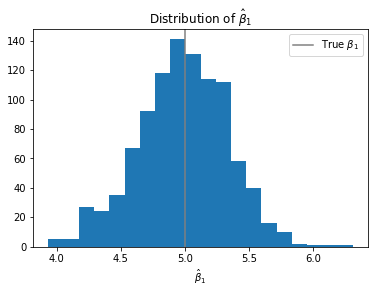

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

beta = [10, 5]

def gen_data(n = 300, random_state=0):
    np.random.seed(random_state)
    x = np.random.uniform(size=n)
    y = beta[0] + x * beta[1] + np.random.normal(size=n)
    return x, y

estimates = []
for seed in range(1000):
    x, y = gen_data(n = 100, random_state=seed)
    df = pd.DataFrame(dict(x=x, y=y))
    beta1 = sum((x - x.mean()) * (y - y.mean())) / sum((x - x.mean())**2)
    estimates.append(beta1)
estimates = np.array(estimates)


fig, ax = plt.subplots()
ax.hist(estimates, bins=20)
ax.axvline(beta[1], color="gray", label=r"True $\beta_1$")
ax.set(title=r"Distribution of $\hat{\beta}_1$", xlabel=r"$\hat{\beta}_1$")
ax.legend()

from myst_nb import glue
glue("dist_beta_fig", fig, display=False)

In [109]:
b = 1
np.exp(b) - 1

1.718281828459045

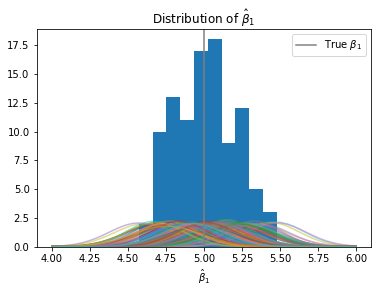

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm


beta = [10, 5]


def gen_data(n = 300, random_state=0):
    np.random.seed(random_state)
    x = np.random.uniform(size=n)
    y = beta[0] + x * beta[1] + np.random.normal(size=n)
    return x, y


def se_beta(x, residuals):
    n = len(x)
    sqd = (x - np.mean(x)) ** 2
    df = 2
    nu = (1 / (n - df)) * np.sum( sqd * (residuals ** 2) )
    de = ( (1 / n) * np.sum(sqd) ) ** 2
    var = (1 / n) * (nu) / (de)
    return np.sqrt(var)


fig, ax = plt.subplots()

estimates = []
se_list = []
for seed in range(100):
    x, y = gen_data(n = 300, random_state=seed)
    df = pd.DataFrame(dict(x=x, y=y))
    model = smf.ols('y ~ x', data=df).fit()

    beta1 = model.params["x"]
    se_beta1 = se_beta(x, residuals=model.resid)

    x_plot = np.linspace(4, 6, 50)
    y_plot = norm.pdf(x=x_plot, loc=beta1, scale=se_beta1)
    ax.plot(x_plot, y_plot, alpha=.5)

    estimates.append(beta1)
    se_list.append(se_beta1)
estimates = np.array(estimates)


ax.hist(estimates, bins=10)
ax.axvline(beta[1], color="gray", label=r"True $\beta_1$")
ax.set(title=r"Distribution of $\hat{\beta}_1$", xlabel=r"$\hat{\beta}_1$")
ax.legend()

from myst_nb import glue
glue("dist_beta_fig", fig, display=False)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     619.8
Date:                Fri, 05 May 2023   Prob (F-statistic):           9.04e-75
Time:                        23:06:23   Log-Likelihood:                -422.93
No. Observations:                 300   AIC:                             849.9
Df Residuals:                     298   BIC:                             857.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0882      0.117     86.551      0.000       9.859      10.318
x              4.9289      0.198     24.896      0.000       4.539       5.318
==============================================================================
Omnibus:                        1.176   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.153
Skew:                          -0.033   Prob(JB):                        0.562
Kurtosis:                       2.703   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# CI
ci = (
    beta1 - 1.96 * se_beta1,
    beta1 + 1.96 * se_beta1
)

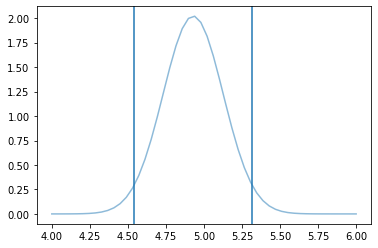

In [106]:
fig, ax = plt.subplots()
x_plot = np.linspace(4, 6, 50)
y_plot = norm.pdf(x=x_plot, loc=beta1, scale=se_beta1)
ax.plot(x_plot, y_plot, alpha=.5)
ax.axvline(ci[0])
ax.axvline(ci[1])

:::{note} データによる例

例えば次のように生成されたデータがあるとする。

$$
\begin{align}
y &= 10 + 5x + e\\
x &\sim \text{Uniform}(0, 1)\\
e &\sim N(0, 1)
\end{align}
$$

シミュレーションによって（データを生成して推定することを繰り返すことによって）この分布を見てみる

```{glue:figure} dist_beta_fig
:figwidth: 70%
:name: "distribution-of-beta"

```
:::

In [61]:
# import numpy as np
# import pandas as pd

# n = 300
# beta = [10, 5]
# np.random.seed(0)
# x = np.random.uniform(size=n)
# df = pd.DataFrame({
#     "x": x,
#     "y": beta[0] + x * beta[1] + np.random.normal(size=n)
# })
# # df.plot.scatter(x="x", y="y")

# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from stargazer.stargazer import Stargazer

# models = [
#     smf.ols('y ~ x', data=df).fit(),
# ]
# Stargazer(models)

## OLS推定量の$t$検定

帰無仮説と対立仮説をそれぞれ

$$
H_0: \beta_k = 0\\
H_1: \beta_k \neq 0\\
$$

とする。$t$統計量を

$$
t = \frac{\hat{\beta}_k}{\sigma}
= \frac{ \sqrt{n} }{ \sqrt{s} } \hat{\beta}_k
$$

と定義すると、これは標準正規分布$N(0,1)$に従う。$|t|>1.96$となればその確率は5%以下であるため有意水準5%で帰無仮説を棄却できる。


### $t$検定の$p$値

帰無仮説$H_0: \beta_k = 0$を棄却するためには有意水準をどこまで引き上げなければいけないかを考える。

$N(0, 1)$に従う$Z$を用いて、$P(|Z|>|t|)$を計算する


## OLS推定量の信頼区間

$\hat{\beta}_k$の漸近分布が$N(\beta_k, \sigma^2_k)$に従うとする。$n$が十分に大きいときは、

$$
Z_k = \frac{\hat{\beta}_k - \beta_k}{\sigma_k}
$$

は$N(0, 1)$に従うものとみなすことができて、

$$
P(|Z_k| \leq 1.96)
= P\left(
    -1.96 \leq
        \frac{\hat{\beta}_k - \beta_k}{\sigma_k}
    \leq 1.96
\right)
= 0.95
$$

と近似できる。そこから95%信頼区間は

$$
\hat{\beta}_k - 1.96 \sigma_k
\leq \beta_k \leq
\hat{\beta}_k + 1.96 \sigma_k
$$

となる

## 回帰の標準誤差

回帰の標準誤差（standard error of the regression: SER）は、回帰誤差$\varepsilon$の標準偏差の推定量

$$
SER = s_{\hat{u}}, \
s_{\hat{u}} = \frac{1}{n-d-1} \sum^n_{i=1} \hat{u}^2_i
$$

（$\hat{u}$の平均はゼロであるため、通常の分散の式における平均で引くような項が存在していない）

ここで$d$は推定している傾きのパラメータ数（定数項も含めれば$d+1$）。下方バイアスが生じることがわかっているので自由度のぶんだけ修正する。
